In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


file_path = 'mushroom_cleaned.csv'
mushroom_data = pd.read_csv(file_path)

display(mushroom_data)

X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


print("правильність на train наборі: {:.3f}".format(knn_model.score(X_train, y_train)))
print("правильність на test наборі: {:.3f}".format(knn_model.score(X_test, y_test)))



,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


Accuracy: 0.9885879958053174
Confusion Matrix:
 [[7237  112]
 [  73 8789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

правильність на train наборі: 0.991
правильність на test наборі: 0.989


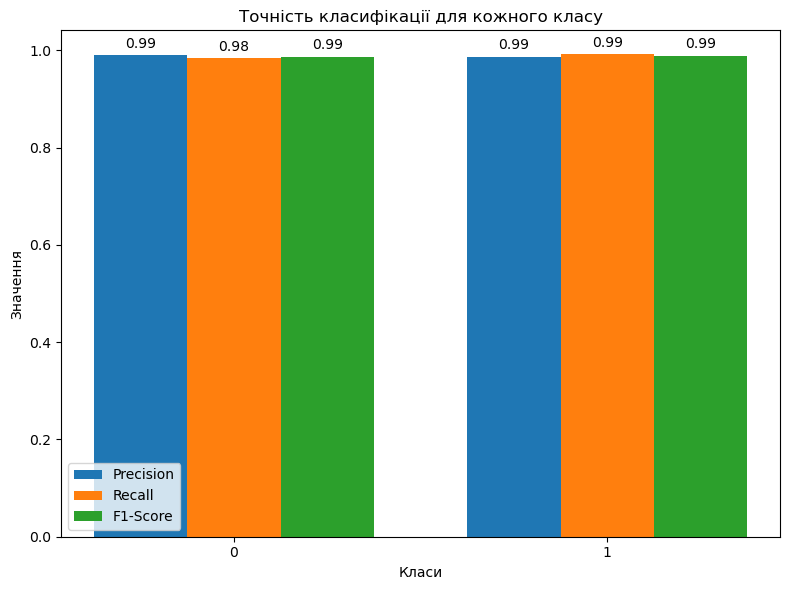

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, output_dict=True)


classes = list(report.keys())[:-3]
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]


x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1-Score')


ax.set_xlabel('Класи')
ax.set_ylabel('Значення')
ax.set_title('Точність класифікації для кожного класу')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()


for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


file_path = 'mushroom_cleaned.csv'
mushroom_data = pd.read_csv(file_path)


X = mushroom_data[['cap-diameter', 'stem-width']].values
y = mushroom_data['class'].astype(str).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)


y_score = clf.predict_proba(X_test)[:, 1]


sample_size = 500
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]
y_score_sample = y_score[sample_indices]


fig = px.scatter(
    x=X_test_sample[:, 0], y=X_test_sample[:, 1],
    color=y_score_sample,
    color_continuous_scale='RdBu',
    symbol=y_test_sample,
    symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'x': 'cap-diameter (scaled)', 'y': 'stem-width (scaled)', 'color': 'Ймовірність класу 1'},
    title='KNN Visualization with Reduced Dataset'
)


fig.update_traces(marker=dict(opacity=0.6, size=12, line_width=1.5))


fig.update_layout(legend_orientation='h')


fig.show()


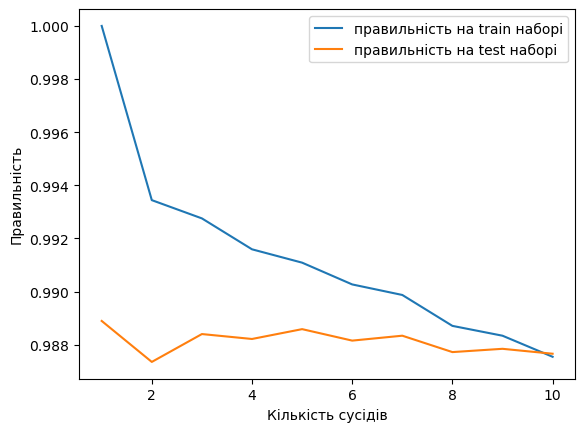

In [ ]:
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(
    neighbors_settings, training_accuracy, label="правильність на train наборі"
)
plt.plot(neighbors_settings, test_accuracy, label="правильність на test наборі")
plt.ylabel("Правильність")
plt.xlabel("Кількість сусідів")
plt.legend()

In [ ]:
class_counts = y_train.value_counts()
class_counts

In [ ]:
k = 5
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=k)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


print("правильність на train наборі: {:.3f}".format(knn_model.score(X_train, y_train)))
print("правильність на test наборі: {:.3f}".format(knn_model.score(X_test, y_test)))

Accuracy: 0.9888964283511196
Confusion Matrix:
 [[7241  108]
 [  72 8790]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.989


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

feature_importances = random_forest.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
5,stem-width,0.223948
2,gill-attachment,0.142141
6,stem-color,0.128395
0,cap-diameter,0.126562
3,gill-color,0.125516
4,stem-height,0.123456
1,cap-shape,0.091935
7,season,0.038047


In [ ]:
y_proba = knn_model.predict_proba(X_test)
y_proba_percent = y_proba[:, 1] * 100

print("Ймовірність отруйності (перші 10 зразків):")
for i in range(10):
    print(f"Зразок {i+1}: {y_proba_percent[i]:.2f}%")
    
print("Ймовірність отруйності (зразки зі значеннями не біля 0% або 100%):")
for i, prob in enumerate(y_proba_percent):
    if 10 < prob < 90:
        print(f"Зразок {i+1}: {prob:.2f}%")

sample = X_test[0].copy()
original_prob = knn_model.predict_proba([sample])[0][1] * 100
print(f"Ймовірність отруйності (оригінальна): {original_prob:.2f}%")

sample[5] = 6
changed_prob = knn_model.predict_proba([sample])[0][1] * 100
print(f"Ймовірність отруйності після зміни 'stem-width' до 6: {changed_prob:.2f}%")


Ймовірність отруйності (перші 10 зразків):
Зразок 1: 0.00%
Зразок 2: 100.00%
Зразок 3: 0.00%
Зразок 4: 0.00%
Зразок 5: 100.00%
Зразок 6: 100.00%
Зразок 7: 100.00%
Зразок 8: 0.00%
Зразок 9: 0.00%
Зразок 10: 0.00%
Ймовірність отруйності (зразки зі значеннями не біля 0% або 100%):
Зразок 26: 18.65%
Зразок 39: 78.01%
Зразок 153: 16.77%
Зразок 166: 20.08%
Зразок 169: 62.43%
Зразок 175: 82.73%
Зразок 213: 56.54%
Зразок 221: 14.13%
Зразок 234: 74.28%
Зразок 267: 28.48%
Зразок 285: 36.95%
Зразок 307: 19.05%
Зразок 313: 83.11%
Зразок 338: 78.75%
Зразок 357: 41.93%
Зразок 385: 19.87%
Зразок 420: 13.63%
Зразок 466: 46.14%
Зразок 471: 83.34%
Зразок 521: 32.77%
Зразок 553: 83.38%
Зразок 573: 44.10%
Зразок 574: 57.52%
Зразок 581: 81.86%
Зразок 649: 81.28%
Зразок 650: 39.98%
Зразок 674: 14.64%
Зразок 712: 60.67%
Зразок 720: 76.82%
Зразок 760: 84.51%
Зразок 790: 86.40%
Зразок 842: 20.73%
Зразок 860: 80.07%
Зразок 868: 81.03%
Зразок 870: 12.16%
Зразок 900: 84.04%
Зразок 917: 89.58%
Зразок 944: 37.11%
З

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

accuracy_nb, conf_matrix_nb, report_nb
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", report_nb)

Accuracy: 0.6363580284991672
Confusion Matrix:
 [[3911 3438]
 [2457 6405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.64     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.64      0.63     16211



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Display results
print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", report_log_reg)


print("Правильність на train фреймі: {:.3f}".format(log_reg_model.score(X_train, y_train)))
print("Правильність на test фреймі: {:.3f}".format(log_reg_model.score(X_test, y_test)))


Accuracy: 0.6348775522793165
Confusion Matrix:
 [[3926 3423]
 [2496 6366]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.63     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.63      0.63     16211

Правильність на train фреймі: 0.635
Правильність на test фреймі: 0.635
